<img src="media/Cryo+ESA_Logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# Visualing sea ice concentrations with Cate 
In this exercise you will use the cate python toolbox to visualize sea ice. After doing this exercise you'll have a good idea to see how sea ice changes over the season, and you'll understand how it cha.nges over the years. 

<img src="media/Thin_sea-ice.jpg" alt="A picture of sea ice taken from a boat" width="1000"/>

*Floating chunks of sea ice, [source](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2016/12/thin_sea-ice/16576336-1-eng-GB/Thin_sea-ice.jpg)*

## Preparations
If you haven't done so please follow the [Cate tutorial](futurelearn.com/tbd) to get started using the exercises.


## Querying the opendata portal

In [1]:
# To get things started we need to initialize a few things
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_REGISTRY
import cate.ops as ops
from cate.util.monitor import ConsoleMonitor

#temporary hack to work around (https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop)
import nest_asyncio
nest_asyncio.apply()
# end temporary hack

monitor=ConsoleMonitor()

In [2]:
#initialize the online data store (In the background this class connects to the service at his connects to the site at https://catalogue.ceda.ac.uk)
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp_os')

In [ ]:
# To get an idea of what is available in the online data portal one can query it and loop over it's result to print some information to the screen

#the query siconc is short for sea ice concentration
seaiceqry=data_store.query(query_expr="siconc")

for i,seaiceItem in enumerate(seaiceqry):
    print("\nDataset item %d:\nds_id: %s"%(i,seaiceItem.id))
    print(seaiceItem)

In [5]:
from datetime import datetime
# OK let's pick out a dataset:the 50 km resolution sea ice concentration dataset which has daily values
# The [0] at the end of the command means that we take the first item of the result list (we actually only expect one item)
seaiceConc=data_store.query("esacci.SEAICE.day.L4.SICONC.multi-sensor.multi-platform.AMSR_50kmEASE2.2-1.NH")[0]

#Open the dataset for use (this may take a while so we only take one year at this stage)
yr=2012
trange=[datetime(yr,1,1),datetime(yr,12,31)]
seaiceDset=seaiceConc.open_dataset(time_range=trange)

## Visualize the arctic sea ice concentration on a given day

plotting sea ice at 2012-07-25


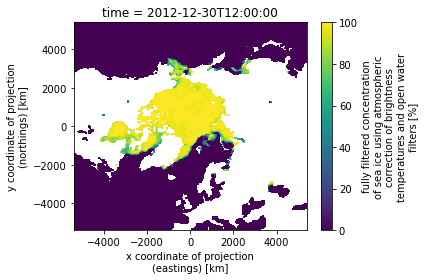

In [6]:
# Plot the sea ice concentration on a chosen day
%matplotlib inline
import numpy as np
ithday=160
print("plotting sea ice at %s"%np.datetime_as_string(seaiceDset.time[2], unit='D'))
seaiceDset.ice_conc.isel(time=ithday).plot()

## Create an animation of the Arctic sea ice concentration

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation,cm
from IPython.display import HTML
import numpy as np
from copy import copy
# Make sure that the initial iconcentrationmage is not shown inline in the notebook
%matplotlib

# We also want to visualize the chang over time so we create an animation with the python module matplotlib
# You can find more information on matplotlib animations here: https://matplotlib.org/stable/api/animation_api.html

ith=0
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

cmSea=copy(cm.get_cmap("bone"))
cmSea.set_bad('grey')
im=ax.imshow(seaiceDset.ice_conc.isel(time=ith).data,cmap=cmSea)

def initSeaice():
    ax.set_title("Sea ice concentration %s"%np.datetime_as_string(seaiceDset.time[ith],unit="D"))    
    return (im,)


def animSeaIce(i):
    print("Animating frame %d"%i,end="\r")
    ax.set_title("Sea ice concentration %s"%np.datetime_as_string(seaiceDset.time[i],unit="D"))
    im.set_array(seaiceDset.ice_conc.isel(time=i).data)
    return (im,)

nframes=seaiceDset.dims["time"]

anim = animation.FuncAnimation(fig, animSeaIce, init_func=initSeaice,
                               frames=nframes, interval=100, 
                               blit=True)

# The to_jshtml call creates some html code and javascript which allows us to control the animation
HTML(anim.to_jshtml())

Using matplotlib backend: agg


# Questions

1. Why is there a relative small amount of sea ice between Greenland and Norway?
2. There are certain locations where not all of the sea ice melts in summer, so called multi-year sea ice. In which locations do you expect to find this multi year sea ice?
3. Try to search online for seasons with expectional low and high coverage of sea ice, and repeat the exercise for those years by modifying the python `yr` variable.
4. How does the sea ice grow in the Russian Arctic? From the coast, the existing sea ice in the central Arctic, or both?